# Importing Packages

Additional imports for all additional necessary functionality is inside `./code/capstone.py` file.

In [1]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Custom code for capstone project
from code import tablemaker as tb
from code import capstone as cs

# Pretty display for notebooks
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing and Encoding Data 

In [2]:
# output progress to console
verb=True

# original data and labels
X, y = cs.make_data(verbose=verb)

# encoding string labels to 0s and 1s
y_coded_outliers, label_encoder = cs.encode_labels(y)

# log-tranforming the data
X_log_outliers = np.log(1 + X) # add 1 to deal with zero values (explained in report)

# removing outliers after log-transofming
X_log, y_coded = cs.remove_outliers(X_log_outliers, y_coded_outliers, iqr_threshold=5.0, verbose=verb)

--------------------------------------------------------------------------------
MAKING DATA
--------------------------------------------------------------------------------
Shape of data is: (569, 32)
--------------------------------------------------------------------------------
Classes add up normally: True
Malignant class: 0.37
Benign class: 0.63
--------------------------------------------------------------------------------
Printing all feature names:
0 radius_mean
1 texture_mean
2 perimeter_mean
3 area_mean
4 smoothness_mean
5 compactness_mean
6 concavity_mean
7 concave points_mean
8 symmetry_mean
9 fractal_dimension_mean
10 radius_se
11 texture_se
12 perimeter_se
13 area_se
14 smoothness_se
15 compactness_se
16 concavity_se
17 concave points_se
18 symmetry_se
19 fractal_dimension_se
20 radius_worst
21 texture_worst
22 perimeter_worst
23 area_worst
24 smoothness_worst
25 compactness_worst
26 concavity_worst
27 concave points_worst
28 symmetry_worst
29 fractal_dimension_worst
--

---

# I. Data Exploration

## Selecting Subsample of Features for Examination 

In [3]:
# selecting 4 random columns
np.random.seed(15)
rand_columns = np.random.choice(X.columns, size=4)

rand_description_df = X[rand_columns].describe()
rand_description_df

# replacing '_' in df with '-' (for latex purposes)
new_cols = []
for i,c in enumerate(rand_description_df.columns):
    c = c.replace("_","-")
    new_cols.append(c)
rand_description_df.columns = new_cols

# # writing to table (already done, so commented out)
# write_to_a_table(
#     rand_description_df, 
#     path_to_output = "./tex/tables/",
#     scap="Description of Subset of Features",
#     caption=" Description of a subset of four features from the feature space",
#     label="subset-descript",
#     tabname="subset-descript",
#     precision=2,
#     first_column_header="Statistic")

rand_data = X[rand_columns] # untransformed original data
rand_data_log = X_log_outliers[rand_columns] # log-transformed with outliers
rand_data_log_no_outliers = X_log[rand_columns] # log-transformed, no outliers

## Plotting Subsample of Features with Transformation

In [4]:
# these colors come from Tableau10 palette
rgb_green = (0.171,0.625,0.171) # for benign class
rgb_red = (0.825,0.152,0.156) # for malignant class
colors=[rgb_green, rgb_red]

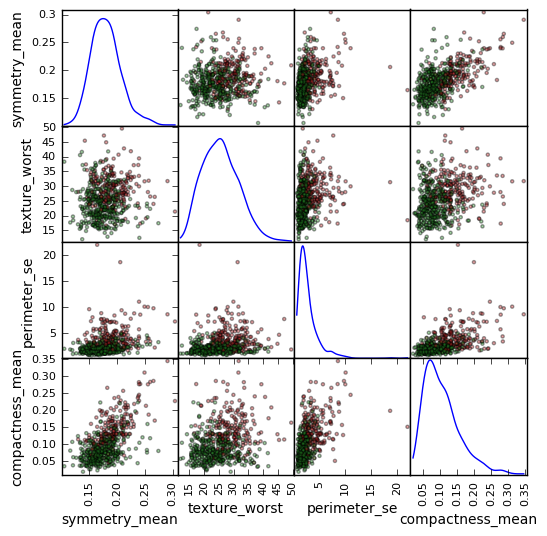

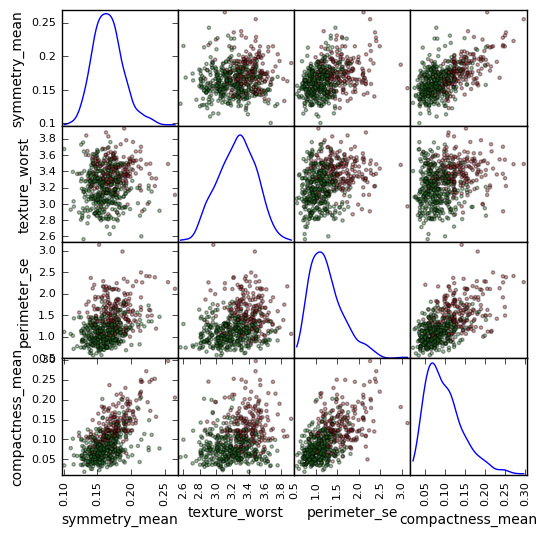

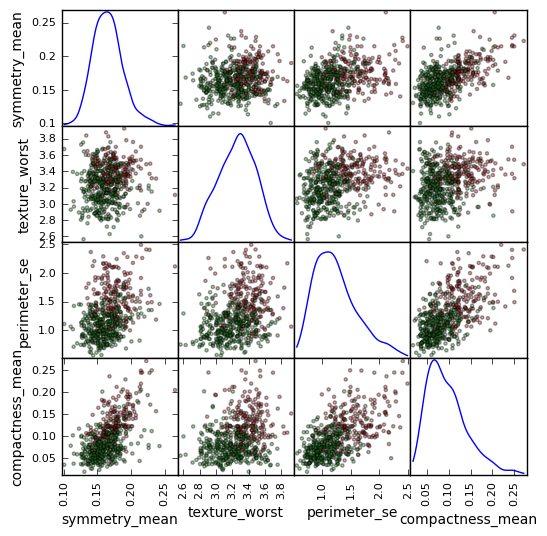

In [5]:
myscatter = pd.scatter_matrix(rand_data, alpha = 0.4, figsize = (6,6), diagonal = 'kde', c=y_coded_outliers.apply(lambda x: colors[x]));
# plt.savefig("./tex/figures/01_rand_data.pdf", bbox_inches='tight', pad_inches=0)
myscatter = pd.scatter_matrix(rand_data_log, alpha = 0.4, figsize = (6,6), diagonal = 'kde', c=y_coded_outliers.apply(lambda x: colors[x]));
# plt.savefig("./tex/figures/02_rand_data_log.pdf", bbox_inches='tight', pad_inches=0)
myscatter = pd.scatter_matrix(rand_data_log_no_outliers, alpha = 0.4, figsize = (6,6), diagonal = 'kde', c=y_coded.apply(lambda x: colors[x]));
# plt.savefig("./tex/figures/03_rand_data_log_no_outliers.pdf", bbox_inches='tight', pad_inches=0)

## Plotting the First Ten Features

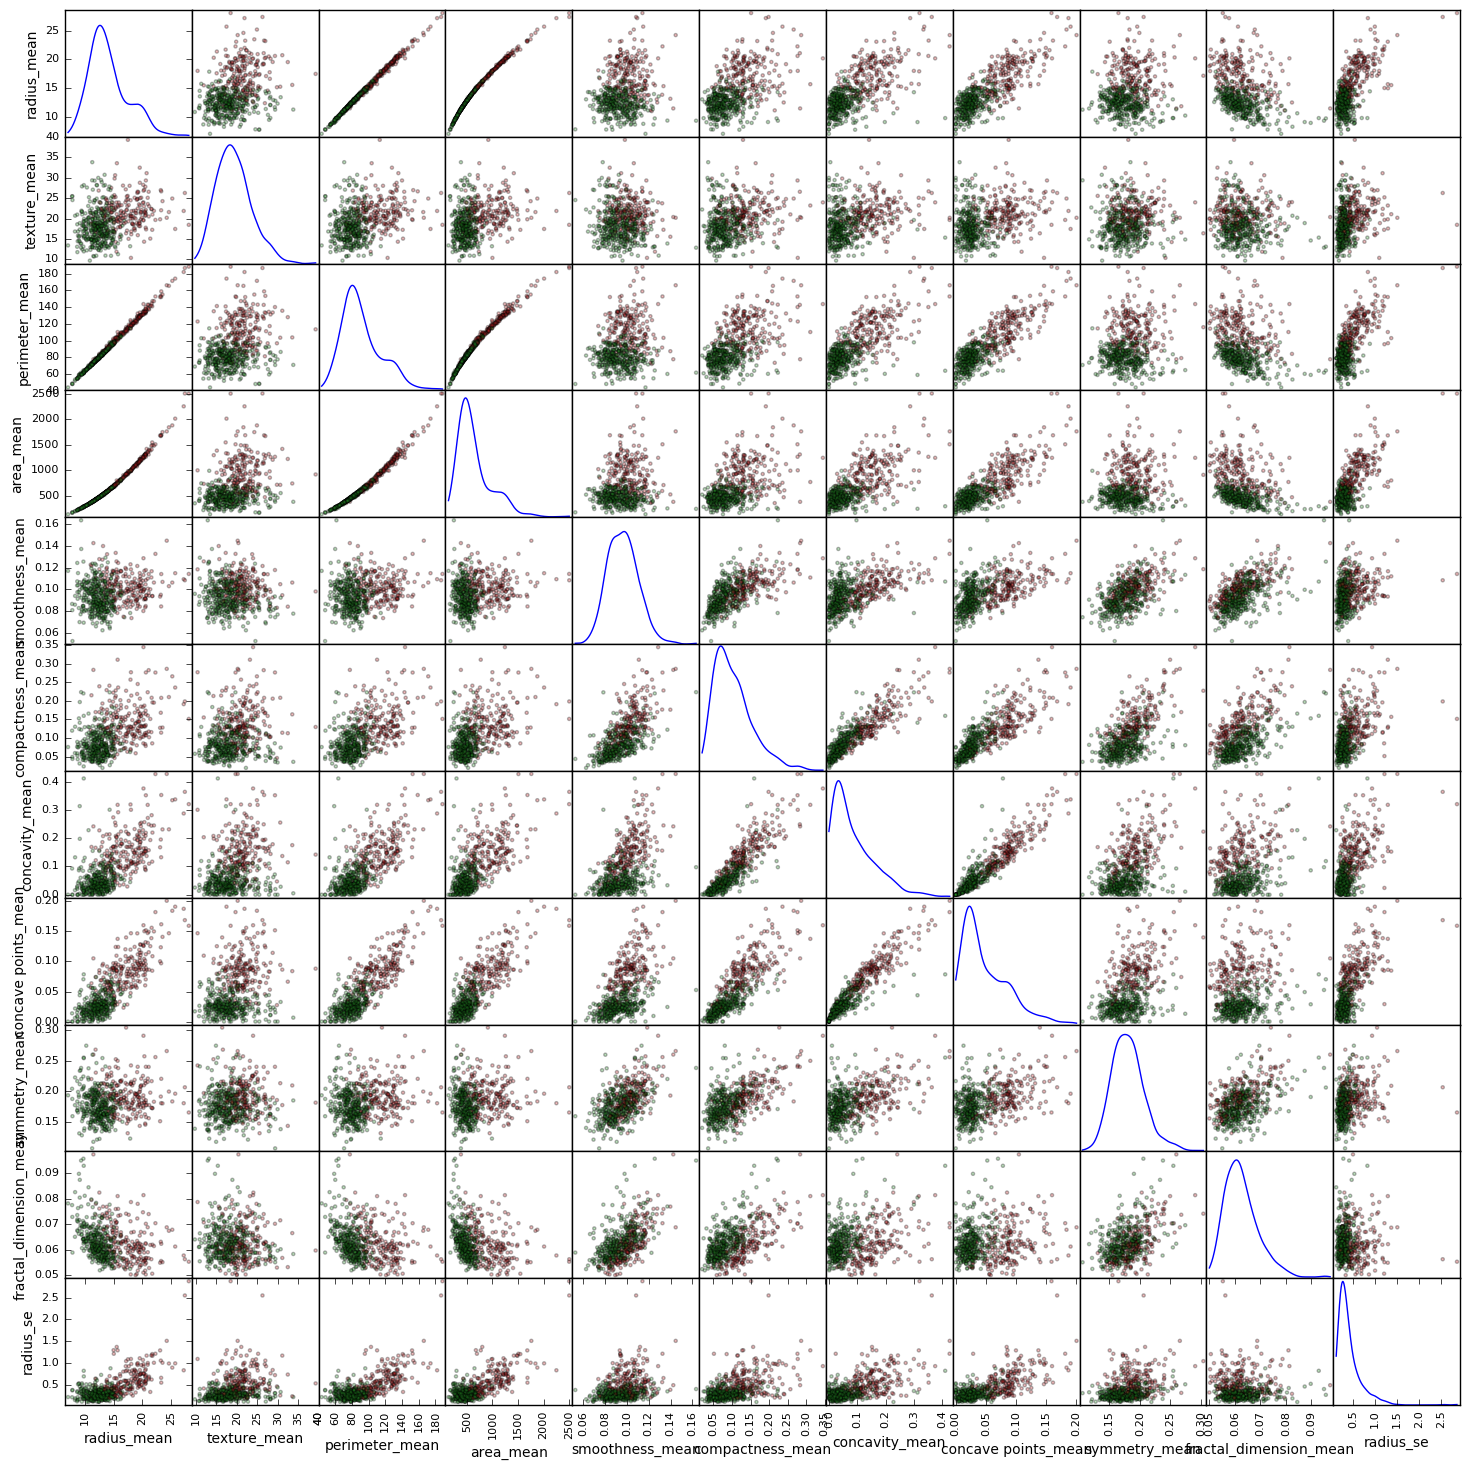

In [6]:
myscatter = pd.scatter_matrix(X[X.columns[:11]], alpha = 0.3, figsize = (18,18), diagonal = 'kde', c=y_coded_outliers.apply(lambda x: colors[x]))
# plt.savefig("./tex/figures/matrix10.pdf", bbox_inches='tight', pad_inches=0)

---

# II. Basic Implementation 

## Additional Experiment: Does log-transform and outlier removal increase performance?

#### Basic Implementation: data not transformed, outliers not removed

In [14]:
verb=True

# classifiers that I chose in report for this project
classifiers = cs.make_list_of_classifiers(verbose=verb)

basic_results_untransformed = cs.basic_implementation_calculate_results(X, y_coded_outliers, classifiers, splits=100, verbose=verb)

basic_results_untransformed_df = cs.make_df_from_results(basic_results_untransformed, classifiers, verbose=verb)

--------------------------------------------------------------------------------
MAKING THE LIST OF CLASSIFIERS
--------------------------------------------------------------------------------
Printing classifiers:
SVC (linear)
SVC (rbf)
SVC (poly)
RandomForestClassifier
AdaBoostClassifier
GaussianNB
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
PERFORMING CROSS-VALIDATION FOR BASIC IMPLEMENTATION
--------------------------------------------------------------------------------
SVC (linear)
--------------------------------------------------------------------------------
SVC (linear): fold 1
SVC (linear): fold 2
SVC (linear): fold 3
SVC (linear): fold 4
SVC (linear): fold 5
SVC (linear): fold 6
SVC (linear): fold 7
SVC (linear): fold 8
SVC (linear): fold 9
SVC (linear): fold 10
SVC (linear): fold 11
SVC (linear): fold 12
SVC (linear): fold 13
SVC (linear): fold 14
SVC (line

In [15]:
basic_results_untransformed_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.953158,0.026728,0.917143,0.974167
SVC (rbf),0.631579,0.000000,0.000000,1.000000
SVC (poly),0.955263,0.026301,0.922857,0.974167
RandomForestClassifier,0.952105,0.026705,0.913810,0.974444
AdaBoostClassifier,0.964386,0.023597,0.939048,0.979167
GaussianNB,0.940702,0.030161,0.893333,0.968333


In [69]:
tb.write_to_a_table(
    basic_results_untransformed_df, 
    path_to_output = "./tex/tables/",
    scap="Basic implementation: untransformed data",
    caption="Basic implementation with untransformed data. 100 runs of stratified shuffled resampling\
    with training and testing were performed to estimate out-of-sample performance with test size of 0.1",
    label="basic-results-untransformed",
    tabname="basic-results-untransformed",
    precision=3,
    first_column_header="Classifier")

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


#### Basic Implementation: data is log-transformed, outliers are removed

In [16]:
verb=True

classifiers2 = cs.make_list_of_classifiers(verbose=verb)

basic_results_log = cs.basic_implementation_calculate_results(X_log, y_coded, classifiers2, splits=100, verbose=verb)

basic_results_log_df = cs.make_df_from_results(basic_results_log, classifiers2, verbose=verb)

--------------------------------------------------------------------------------
MAKING THE LIST OF CLASSIFIERS
--------------------------------------------------------------------------------
Printing classifiers:
SVC (linear)
SVC (rbf)
SVC (poly)
RandomForestClassifier
AdaBoostClassifier
GaussianNB
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
PERFORMING CROSS-VALIDATION FOR BASIC IMPLEMENTATION
--------------------------------------------------------------------------------
SVC (linear)
--------------------------------------------------------------------------------
SVC (linear): fold 1
SVC (linear): fold 2
SVC (linear): fold 3
SVC (linear): fold 4
SVC (linear): fold 5
SVC (linear): fold 6
SVC (linear): fold 7
SVC (linear): fold 8
SVC (linear): fold 9
SVC (linear): fold 10
SVC (linear): fold 11
SVC (linear): fold 12
SVC (linear): fold 13
SVC (linear): fold 14
SVC (line

In [17]:
basic_results_log_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.965179,0.023334,0.935714,0.982857
SVC (rbf),0.939643,0.028769,0.872857,0.979714
SVC (poly),0.957857,0.024811,0.919048,0.981143
RandomForestClassifier,0.956607,0.027346,0.918571,0.979429
AdaBoostClassifier,0.966071,0.022938,0.937143,0.983429
GaussianNB,0.947321,0.030133,0.916667,0.965714


In [70]:
tb.write_to_a_table(
    basic_results_log_df, 
    path_to_output = "./tex/tables/",
    scap="Accuracy without grid seach",
    caption="Basic implementation with log-transformed data and removed outliers. 100 runs of stratified shuffled resampling\
    with training and testing were performed to estimate out-of-sample performance with test size of 0.1",
    label="basic-results-transformed",
    tabname="basic-results-transformed",
    precision=3,
    first_column_header="Classifier")

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


---

# II. Refinement

## Additional Experiment: Does Changing Scoring Function Affect Model's Performance? 

Here I will pefrorm nested cross-validation with gread search and pipelines.

In addition to improving performance of algorithms using `GridSearchCV` on a `Pipeline` in the inner loop and evaluating out-of-sample performance of the best model in the outer loop, I would like to check how a differenct choice of a scoring function affects results of experiments.

The scoring function is used when a `GridSearchCV` object decides on the best set of a model's hyperparameters.

### Making Custom Scoring Functions 

In [7]:
from sklearn.metrics import classification_report, fbeta_score, f1_score, make_scorer

f_50_scorer = make_scorer(fbeta_score, beta=50)
f1_scorer = make_scorer(f1_score)

### Default scoring function (accuracy) 

In [8]:
classifiers_acc = cs.make_list_of_classifiers(verbose=verb)
improved_results_acc, grids_acc = cs.improved_nested_calculate_results(X_log, 
                                                                   y_coded, 
                                                                   classifiers_acc, 
                                                                   scorer=None,
                                                                   outer_loop_splits=10, 
                                                                   grid_search_loops=10, 
                                                                   test_size=0.15,
                                                                   verbose=verb)

improved_results_acc_df = cs.make_df_from_results(improved_results_acc, classifiers_acc, verbose=verb)

--------------------------------------------------------------------------------
MAKING THE LIST OF CLASSIFIERS
--------------------------------------------------------------------------------
Printing classifiers:
SVC (linear)
SVC (rbf)
SVC (poly)
RandomForestClassifier
AdaBoostClassifier
GaussianNB
--------------------------------------------------------------------------------
----------------------------------------------------
PERFORMING NESTED CROSS-VALIDATION WITH GRID_SEARCH_CV
----------------------------------------------------
SVC (linear)
----------------------------------------------------
SVC (linear): fold 1
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.1s finished


SVC (linear): fold 2
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.0s finished


SVC (linear): fold 3
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.2s finished


SVC (linear): fold 4
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.4s finished


SVC (linear): fold 5
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.3s finished


SVC (linear): fold 6
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.0s finished


SVC (linear): fold 7
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.1s finished


SVC (linear): fold 8
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.7s finished


SVC (linear): fold 9
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.4s finished


SVC (linear): fold 10
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.7s finished


Average accuracy is: 0.982142857143
Average TPR is: 0.961290322581
Average TNR is: 0.994339622642
----------------------------------------------------
SVC (rbf)
----------------------------------------------------
SVC (rbf): fold 1
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 2
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 3
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.7min finished


SVC (rbf): fold 4
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 5
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.7min finished


SVC (rbf): fold 6
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 7
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.5min finished


SVC (rbf): fold 8
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 9
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.5min finished


SVC (rbf): fold 10
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.5min finished


Average accuracy is: 0.980952380952
Average TPR is: 0.958064516129
Average TNR is: 0.994339622642
----------------------------------------------------
SVC (poly)
----------------------------------------------------
SVC (poly): fold 1
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.9s finished


SVC (poly): fold 2
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.9s finished


SVC (poly): fold 3
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.7s finished


SVC (poly): fold 4
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.9s finished


SVC (poly): fold 5
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   34.1s finished


SVC (poly): fold 6
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.7s finished


SVC (poly): fold 7
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.7s finished


SVC (poly): fold 8
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.7s finished


SVC (poly): fold 9
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.8s finished


SVC (poly): fold 10
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   33.7s finished


Average accuracy is: 0.97380952381
Average TPR is: 0.954838709677
Average TNR is: 0.984905660377
----------------------------------------------------
RandomForestClassifier
----------------------------------------------------
RandomForestClassifier: fold 1
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   41.5s finished


RandomForestClassifier: fold 2
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   41.7s finished


RandomForestClassifier: fold 3
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   41.0s finished


RandomForestClassifier: fold 4
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.6s finished


RandomForestClassifier: fold 5
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   38.8s finished


RandomForestClassifier: fold 6
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   38.8s finished


RandomForestClassifier: fold 7
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.3s finished


RandomForestClassifier: fold 8
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.7s finished


RandomForestClassifier: fold 9
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   38.8s finished


RandomForestClassifier: fold 10
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.1s finished


Average accuracy is: 0.954761904762
Average TPR is: 0.925806451613
Average TNR is: 0.971698113208
----------------------------------------------------
AdaBoostClassifier
----------------------------------------------------
AdaBoostClassifier: fold 1
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   24.9s finished


AdaBoostClassifier: fold 2
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.3s finished


AdaBoostClassifier: fold 3
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.3s finished


AdaBoostClassifier: fold 4
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.3s finished


AdaBoostClassifier: fold 5
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.3s finished


AdaBoostClassifier: fold 6
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished


AdaBoostClassifier: fold 7
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   24.9s finished


AdaBoostClassifier: fold 8
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.3s finished


AdaBoostClassifier: fold 9
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.2s finished


AdaBoostClassifier: fold 10
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished


Average accuracy is: 0.969047619048
Average TPR is: 0.945161290323
Average TNR is: 0.983018867925
----------------------------------------------------
GaussianNB
----------------------------------------------------
GaussianNB: fold 1
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 2
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 3
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 4
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 5
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 6
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 7
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 8
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 9
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 10
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Average accuracy is: 0.938095238095
Average TPR is: 0.9
Average TNR is: 0.960377358491
----------------------------------------------------
FINAL RESULTS
----------------------------------------------------
Classifier: accuracy (SD), TPR, TNR
----------------------------------------------------
SVC (linear): accuracy 0.9821 (0.0080); TPR 0.9613; TNR 0.9943
SVC (rbf): accuracy 0.9810 (0.0095); TPR 0.9581; TNR 0.9943
SVC (poly): accuracy 0.9738 (0.0128); TPR 0.9548; TNR 0.9849
RandomForestClassifier: accuracy 0.9548 (0.0286); TPR 0.9258; TNR 0.9717
AdaBoostClassifier: accuracy 0.9690 (0.0170); TPR 0.9452; TNR 0.9830
GaussianNB: accuracy 0.9381 (0.0300); TPR 0.9000; TNR 0.9604
----------------------------------------------------


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


In [9]:
improved_results_acc_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.982143,0.007986,0.961290,0.994340
SVC (rbf),0.980952,0.009524,0.958065,0.994340
SVC (poly),0.973810,0.012822,0.954839,0.984906
RandomForestClassifier,0.954762,0.028571,0.925806,0.971698
AdaBoostClassifier,0.969048,0.017003,0.945161,0.983019
GaussianNB,0.938095,0.030023,0.900000,0.960377


In [71]:
tb.write_to_a_table(
    improved_results_acc_df, 
    path_to_output = "./tex/tables/",
    scap="Refined implementation: accuracy scorer",
    caption="Refined implementation with accuracy scorer. Nested cross-validation (stratified shuffle split) with \
    10 folds both in inner and outer loops (100 folds in total). Test size in each fold is 0.15.",
    label="refined-results-acc",
    tabname="refined-results-acc",
    precision=3,
    first_column_header="Classifier")

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


### F1 Scoring Function 

In [10]:
classifiers_f1 = cs.make_list_of_classifiers(verbose=verb)
improved_results_f1, grids_f1 = cs.improved_nested_calculate_results(X_log, 
                                                                   y_coded, 
                                                                   classifiers_f1, 
                                                                   scorer=f1_scorer,
                                                                   outer_loop_splits=10, 
                                                                   grid_search_loops=10, 
                                                                   test_size=0.15,
                                                                   verbose=verb)

improved_results_f1_df = cs.make_df_from_results(improved_results_f1, classifiers_f1, verbose=verb)

--------------------------------------------------------------------------------
MAKING THE LIST OF CLASSIFIERS
--------------------------------------------------------------------------------
Printing classifiers:
SVC (linear)
SVC (rbf)
SVC (poly)
RandomForestClassifier
AdaBoostClassifier
GaussianNB
--------------------------------------------------------------------------------
----------------------------------------------------
PERFORMING NESTED CROSS-VALIDATION WITH GRID_SEARCH_CV
----------------------------------------------------
SVC (linear)
----------------------------------------------------
SVC (linear): fold 1
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.9s finished


SVC (linear): fold 2
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


/Users/Fazzl/Virtualenvs/thematrix/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.3s finished


SVC (linear): fold 3
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.0s finished


SVC (linear): fold 4
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.7s finished


SVC (linear): fold 5
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.0s finished


SVC (linear): fold 6
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.9s finished


SVC (linear): fold 7
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.7s finished


SVC (linear): fold 8
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.2s finished


SVC (linear): fold 9
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.8s finished


SVC (linear): fold 10
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.7s finished


Average accuracy is: 0.982142857143
Average TPR is: 0.964516129032
Average TNR is: 0.992452830189
----------------------------------------------------
SVC (rbf)
----------------------------------------------------
SVC (rbf): fold 1
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 2
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 3
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 4
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 5
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 6
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 7
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 8
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 9
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 10
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


Average accuracy is: 0.980952380952
Average TPR is: 0.958064516129
Average TNR is: 0.994339622642
----------------------------------------------------
SVC (poly)
----------------------------------------------------
SVC (poly): fold 1
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.6s finished


SVC (poly): fold 2
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.3s finished


SVC (poly): fold 3
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   36.0s finished


SVC (poly): fold 4
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.3s finished


SVC (poly): fold 5
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.9s finished


SVC (poly): fold 6
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   37.8s finished


SVC (poly): fold 7
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   45.1s finished


SVC (poly): fold 8
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   37.0s finished


SVC (poly): fold 9
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   37.3s finished


SVC (poly): fold 10
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.7s finished


Average accuracy is: 0.97619047619
Average TPR is: 0.954838709677
Average TNR is: 0.988679245283
----------------------------------------------------
RandomForestClassifier
----------------------------------------------------
RandomForestClassifier: fold 1
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.3s finished


RandomForestClassifier: fold 2
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.1s finished


RandomForestClassifier: fold 3
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   38.8s finished


RandomForestClassifier: fold 4
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.5s finished


RandomForestClassifier: fold 5
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.1s finished


RandomForestClassifier: fold 6
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.0s finished


RandomForestClassifier: fold 7
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.2s finished


RandomForestClassifier: fold 8
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.2s finished


RandomForestClassifier: fold 9
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.2s finished


RandomForestClassifier: fold 10
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.4s finished


Average accuracy is: 0.954761904762
Average TPR is: 0.925806451613
Average TNR is: 0.971698113208
----------------------------------------------------
AdaBoostClassifier
----------------------------------------------------
AdaBoostClassifier: fold 1
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.2s finished


AdaBoostClassifier: fold 2
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.5s finished


AdaBoostClassifier: fold 3
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished


AdaBoostClassifier: fold 4
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.3s finished


AdaBoostClassifier: fold 5
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished


AdaBoostClassifier: fold 6
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished


AdaBoostClassifier: fold 7
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.6s finished


AdaBoostClassifier: fold 8
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.0s finished


AdaBoostClassifier: fold 9
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.6s finished


AdaBoostClassifier: fold 10
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished


Average accuracy is: 0.969047619048
Average TPR is: 0.948387096774
Average TNR is: 0.981132075472
----------------------------------------------------
GaussianNB
----------------------------------------------------
GaussianNB: fold 1
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GaussianNB: fold 2
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 3
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 4
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 5
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 6
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 7
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 8
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 9
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 10
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Average accuracy is: 0.935714285714
Average TPR is: 0.893548387097
Average TNR is: 0.960377358491
----------------------------------------------------
FINAL RESULTS
----------------------------------------------------
Classifier: accuracy (SD), TPR, TNR
----------------------------------------------------
SVC (linear): accuracy 0.9821 (0.0060); TPR 0.9645; TNR 0.9925
SVC (rbf): accuracy 0.9810 (0.0095); TPR 0.9581; TNR 0.9943
SVC (poly): accuracy 0.9762 (0.0130); TPR 0.9548; TNR 0.9887
RandomForestClassifier: accuracy 0.9548 (0.0286); TPR 0.9258; TNR 0.9717
AdaBoostClassifier: accuracy 0.9690 (0.0170); TPR 0.9484; TNR 0.9811
GaussianNB: accuracy 0.9357 (0.0278); TPR 0.8935; TNR 0.9604
----------------------------------------------------


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


In [11]:
improved_results_f1_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.982143,0.005952,0.964516,0.992453
SVC (rbf),0.980952,0.009524,0.958065,0.994340
SVC (poly),0.976190,0.013041,0.954839,0.988679
RandomForestClassifier,0.954762,0.028571,0.925806,0.971698
AdaBoostClassifier,0.969048,0.017003,0.948387,0.981132
GaussianNB,0.935714,0.027766,0.893548,0.960377


In [72]:
tb.write_to_a_table(
    improved_results_f1_df, 
    path_to_output = "./tex/tables/",
    scap="Refined implementation: f1 scorer",
    caption="Refined implementation with f1 scorer. Nested cross-validation (stratified shuffle split) with \
    10 folds both in inner and outer loops (100 folds in total). Test size in each fold is 0.15.",
    label="refined-results-f1",
    tabname="refined-results-f1",
    precision=3,
    first_column_header="Classifier")

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


### F-beta(50) Scoring Function 

In [12]:
classifiers_f50 = cs.make_list_of_classifiers(verbose=verb)
improved_results_f50, grids_f50 = cs.improved_nested_calculate_results(X_log, 
                                                                   y_coded, 
                                                                   classifiers_f50,
                                                                   scorer=f_50_scorer,
                                                                   outer_loop_splits=10, 
                                                                   grid_search_loops=10, 
                                                                   test_size=0.15,
                                                                   verbose=verb)

improved_results_f50_df = cs.make_df_from_results(improved_results_f50, classifiers_f50, verbose=verb)

--------------------------------------------------------------------------------
MAKING THE LIST OF CLASSIFIERS
--------------------------------------------------------------------------------
Printing classifiers:
SVC (linear)
SVC (rbf)
SVC (poly)
RandomForestClassifier
AdaBoostClassifier
GaussianNB
--------------------------------------------------------------------------------
----------------------------------------------------
PERFORMING NESTED CROSS-VALIDATION WITH GRID_SEARCH_CV
----------------------------------------------------
SVC (linear)
----------------------------------------------------
SVC (linear): fold 1
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.9s finished


SVC (linear): fold 2
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.3s finished


SVC (linear): fold 3
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.0s finished


SVC (linear): fold 4
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.8s finished


SVC (linear): fold 5
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.0s finished


SVC (linear): fold 6
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.8s finished


SVC (linear): fold 7
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.9s finished


SVC (linear): fold 8
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.3s finished


SVC (linear): fold 9
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.9s finished


SVC (linear): fold 10
clf_name: SVC (linear)
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    5.8s finished


Average accuracy is: 0.978571428571
Average TPR is: 0.967741935484
Average TNR is: 0.984905660377
----------------------------------------------------
SVC (rbf)
----------------------------------------------------
SVC (rbf): fold 1
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 2
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 3
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 4
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 5
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 6
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 7
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 8
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 9
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.6min finished


SVC (rbf): fold 10
clf_name: SVC (rbf)
Fitting 10 folds for each of 546 candidates, totalling 5460 fits


[Parallel(n_jobs=1)]: Done 5460 out of 5460 | elapsed:  1.7min finished


Average accuracy is: 0.97380952381
Average TPR is: 0.954838709677
Average TNR is: 0.984905660377
----------------------------------------------------
SVC (poly)
----------------------------------------------------
SVC (poly): fold 1
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.9s finished


SVC (poly): fold 2
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   36.5s finished


SVC (poly): fold 3
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.8s finished


SVC (poly): fold 4
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.6s finished


SVC (poly): fold 5
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.7s finished


SVC (poly): fold 6
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   36.0s finished


SVC (poly): fold 7
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.2s finished


SVC (poly): fold 8
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   36.4s finished


SVC (poly): fold 9
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   36.1s finished


SVC (poly): fold 10
clf_name: SVC (poly)
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   35.5s finished


Average accuracy is: 0.977380952381
Average TPR is: 0.964516129032
Average TNR is: 0.984905660377
----------------------------------------------------
RandomForestClassifier
----------------------------------------------------
RandomForestClassifier: fold 1
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.3s finished


RandomForestClassifier: fold 2
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   38.7s finished


RandomForestClassifier: fold 3
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.3s finished


RandomForestClassifier: fold 4
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   39.3s finished


RandomForestClassifier: fold 5
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   38.9s finished


RandomForestClassifier: fold 6
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   38.7s finished


RandomForestClassifier: fold 7
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   42.3s finished


RandomForestClassifier: fold 8
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   43.0s finished


RandomForestClassifier: fold 9
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   40.4s finished


RandomForestClassifier: fold 10
clf_name: RandomForestClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   44.6s finished


Average accuracy is: 0.954761904762
Average TPR is: 0.925806451613
Average TNR is: 0.971698113208
----------------------------------------------------
AdaBoostClassifier
----------------------------------------------------
AdaBoostClassifier: fold 1
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   26.5s finished


AdaBoostClassifier: fold 2
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.5s finished


AdaBoostClassifier: fold 3
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   26.3s finished


AdaBoostClassifier: fold 4
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished


AdaBoostClassifier: fold 5
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   28.7s finished


AdaBoostClassifier: fold 6
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   26.1s finished


AdaBoostClassifier: fold 7
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   26.0s finished


AdaBoostClassifier: fold 8
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   26.4s finished


AdaBoostClassifier: fold 9
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   26.1s finished


AdaBoostClassifier: fold 10
clf_name: AdaBoostClassifier
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   27.7s finished


Average accuracy is: 0.969047619048
Average TPR is: 0.948387096774
Average TNR is: 0.981132075472
----------------------------------------------------
GaussianNB
----------------------------------------------------
GaussianNB: fold 1
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GaussianNB: fold 2
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GaussianNB: fold 3
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 4
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 5
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 6
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GaussianNB: fold 7
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GaussianNB: fold 8
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GaussianNB: fold 9
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GaussianNB: fold 10
clf_name: GaussianNB
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Average accuracy is: 0.934523809524
Average TPR is: 0.890322580645
Average TNR is: 0.960377358491
----------------------------------------------------
FINAL RESULTS
----------------------------------------------------
Classifier: accuracy (SD), TPR, TNR
----------------------------------------------------
SVC (linear): accuracy 0.9786 (0.0104); TPR 0.9677; TNR 0.9849
SVC (rbf): accuracy 0.9738 (0.0149); TPR 0.9548; TNR 0.9849
SVC (poly): accuracy 0.9774 (0.0124); TPR 0.9645; TNR 0.9849
RandomForestClassifier: accuracy 0.9548 (0.0286); TPR 0.9258; TNR 0.9717
AdaBoostClassifier: accuracy 0.9690 (0.0170); TPR 0.9484; TNR 0.9811
GaussianNB: accuracy 0.9345 (0.0262); TPR 0.8903; TNR 0.9604
----------------------------------------------------


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


In [13]:
improved_results_f50_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.978571,0.010378,0.967742,0.984906
SVC (rbf),0.973810,0.014869,0.954839,0.984906
SVC (poly),0.977381,0.012429,0.964516,0.984906
RandomForestClassifier,0.954762,0.028571,0.925806,0.971698
AdaBoostClassifier,0.969048,0.017003,0.948387,0.981132
GaussianNB,0.934524,0.026218,0.890323,0.960377


In [73]:
tb.write_to_a_table(
    improved_results_f50_df, 
    path_to_output = "./tex/tables/",
    scap="Refined implementation: f50 scorer",
    caption="Refined implementation with custom f-beta(50) scorer. Nested cross-validation (stratified shuffle split) \
    with 10 folds both in inner and outer loops (100 folds in total). Test size in each fold is 0.15.",
    label="refined-results-f50",
    tabname="refined-results-f50",
    precision=3,
    first_column_header="Classifier")

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


---

# III. Analying Results

### Making DataFrame of benchmark results 

In [56]:
# banchmark df
bench_df

# basic result df
basic_results_untransformed_df
basic_results_log_df

# improved results df
improved_results_acc_df
improved_results_f1_df
improved_results_f50_df

In [99]:
# improvement of transformed basic over benchmark
bench_to_basic_improvement_df = cs.calculate_improvements(bench_df, basic_results_log_df, 
                                                    write_to_table=False, # already written to table 
                                                    path_to_output="./tex/tables/",
                                                    scap="Improvement of transformation", 
                                                    caption="Improvement of basic implementation over benchmark", 
                                                    label="diff-basic-bench", 
                                                    tabname="diff-basic-bench", 
                                                    precision=3, 
                                                    fcol="Classifier")
bench_to_basic_improvement_df

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


,Accuracy,TPR,TNR
SVC (linear),0.230310,0.299603,0.213404
SVC (rbf),0.003570,-0.071429,0.064907
SVC (poly),0.313392,0.351541,0.308190
RandomForestClassifier,0.000217,-0.053019,0.041945
GaussianNB,0.521313,0.608187,0.341270


### Improvement of log-transform and outlier removal

In [97]:
# does log-transform and removal outliers help?
log_transform_improvement_df = cs.calculate_improvements(basic_results_untransformed_df, basic_results_log_df, 
                                                    write_to_table=False, # already written to table 
                                                    path_to_output="./tex/tables/",
                                                    scap="Improvement of transformation", 
                                                    caption="Improvement of transformation over untransformed results", 
                                                    label="diff-of-transforms", 
                                                    tabname="diff-of-transforms", 
                                                    precision=3, 
                                                    fcol="Classifier")
log_transform_improvement_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.012611,-0.126988,0.020249,0.008921
SVC (rbf),0.487768,inf,inf,-0.020286
SVC (poly),0.002715,-0.056677,-0.004128,0.007161
RandomForestClassifier,0.004728,0.023989,0.005211,0.005115
AdaBoostClassifier,0.001748,-0.027930,-0.002028,0.004353
GaussianNB,0.007037,-0.000930,0.026119,-0.002705


### Table of results for benchmark, basic and refined models 

In [216]:
bench_df

,Accuracy,TPR,TNR
SVC (linear),0.7845,0.72,0.81
SVC (rbf),0.9363,0.94,0.92
SVC (poly),0.7293,0.68,0.75
RandomForestClassifier,0.9564,0.97,0.94
GaussianNB,0.6227,0.57,0.72


In [65]:
basic_results_log_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.965179,0.023334,0.935714,0.982857
SVC (rbf),0.939643,0.028769,0.872857,0.979714
SVC (poly),0.957857,0.024811,0.919048,0.981143
RandomForestClassifier,0.956607,0.027346,0.918571,0.979429
AdaBoostClassifier,0.966071,0.022938,0.937143,0.983429
GaussianNB,0.947321,0.030133,0.916667,0.965714


In [67]:
improved_results_acc_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.982143,0.007986,0.961290,0.994340
SVC (rbf),0.980952,0.009524,0.958065,0.994340
SVC (poly),0.973810,0.012822,0.954839,0.984906
RandomForestClassifier,0.954762,0.028571,0.925806,0.971698
AdaBoostClassifier,0.969048,0.017003,0.945161,0.983019
GaussianNB,0.938095,0.030023,0.900000,0.960377


In [68]:
improved_results_f1_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.982143,0.005952,0.964516,0.992453
SVC (rbf),0.980952,0.009524,0.958065,0.994340
SVC (poly),0.976190,0.013041,0.954839,0.988679
RandomForestClassifier,0.954762,0.028571,0.925806,0.971698
AdaBoostClassifier,0.969048,0.017003,0.948387,0.981132
GaussianNB,0.935714,0.027766,0.893548,0.960377


In [66]:
improved_results_f50_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.978571,0.010378,0.967742,0.984906
SVC (rbf),0.973810,0.014869,0.954839,0.984906
SVC (poly),0.977381,0.012429,0.964516,0.984906
RandomForestClassifier,0.954762,0.028571,0.925806,0.971698
AdaBoostClassifier,0.969048,0.017003,0.948387,0.981132
GaussianNB,0.934524,0.026218,0.890323,0.960377


### Are F1 and F50 better than accuracy? (no, they aren't) 

In [53]:
# is f1 better than accuracy?
f1_acc_improvement_df = cs.calculate_improvements(improved_results_acc_df, improved_results_f1_df)
f1_acc_improvement_df

,Accuracy,SD,TPR,TNR
SVC (linear),0.000000,-0.254644,0.003356,-0.001898
SVC (rbf),0.000000,0.000000,0.000000,0.000000
SVC (poly),0.002445,0.017095,0.000000,0.003831
RandomForestClassifier,0.000000,0.000000,0.000000,0.000000
AdaBoostClassifier,0.000000,0.000000,0.003413,-0.001919
GaussianNB,-0.002538,-0.075151,-0.007168,0.000000


In [54]:
# is f50 better than accuracy?
f50_acc_improvement_df = cs.calculate_improvements(improved_results_acc_df, improved_results_f50_df)
f50_acc_improvement_df

,Accuracy,SD,TPR,TNR
SVC (linear),-0.003636,0.299573,0.006711,-9.487666e-03
SVC (rbf),-0.007282,0.561249,-0.003367,-9.487666e-03
SVC (poly),0.003667,-0.030642,0.010135,-2.254476e-16
RandomForestClassifier,0.000000,0.000000,0.000000,0.000000e+00
AdaBoostClassifier,0.000000,0.000000,0.003413,-1.919386e-03
GaussianNB,-0.003807,-0.126743,-0.010753,0.000000e+00


In [63]:
cs.calculate_impovements(basic_results_log_df, improved_results_acc_df)

,Accuracy,SD,TPR,TNR
SVC (linear),0.017576,-0.657757,0.027333,0.011683
SVC (rbf),0.043963,-0.668960,0.097619,0.014928
SVC (poly),0.016654,-0.483210,0.038944,0.003835
RandomForestClassifier,-0.001929,0.044815,0.007876,-0.007893
AdaBoostClassifier,0.003081,-0.258721,0.008556,-0.000417
GaussianNB,-0.009739,-0.003665,-0.018182,-0.005526


### Improvement of refined model over basic log-transformed 

In [220]:
diff_refined_basic_df = cs.calculate_improvements(basic_results_log_df, improved_results_acc_df,
                                                    write_to_table=False, # already written to table 
                                                    path_to_output="./tex/tables/",
                                                    scap="Improvement of model refinement over basic results", 
                                                    caption="Improvement of model refinement over basic results", 
                                                    label="diff-refined-basic", 
                                                    tabname="diff-refined-basic", 
                                                    precision=3, 
                                                    fcol="Classifier")
diff_refined_basic_df

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


,Accuracy,SD,TPR,TNR
SVC (linear),0.017576,-0.657757,0.027333,0.011683
SVC (rbf),0.043963,-0.668960,0.097619,0.014928
SVC (poly),0.016654,-0.483210,0.038944,0.003835
RandomForestClassifier,-0.001929,0.044815,0.007876,-0.007893
AdaBoostClassifier,0.003081,-0.258721,0.008556,-0.000417
GaussianNB,-0.009739,-0.003665,-0.018182,-0.005526


### Improvement of refined model over benchmark

In [222]:
diff_refined_bench_df = cs.calculate_improvements(bench_df, improved_results_acc_df,
                                                    write_to_table=False, # already written to table 
                                                    path_to_output="./tex/tables/",
                                                    scap="Improvement of model refinement over benchmark", 
                                                    caption="Improvement of model refinement over benchmark", 
                                                    label="diff-refined-bench", 
                                                    tabname="diff-refined-bench", 
                                                    precision=3, 
                                                    fcol="Classifier")
diff_refined_bench_df

--------------------------------------------------------------------------------
SUCESSFUL OUTPUT TO A .TEX TABLE
--------------------------------------------------------------------------------


,Accuracy,TPR,TNR
SVC (linear),0.251935,0.335125,0.227580
SVC (rbf),0.047690,0.019218,0.080804
SVC (poly),0.335266,0.404175,0.313208
RandomForestClassifier,-0.001713,-0.045560,0.033721
GaussianNB,0.506496,0.578947,0.333857


---

## Statistical Analysis of Two Sample Means

In [230]:
# calculating p values
from scipy import stats

def pooled_sd(s1, n1, s2, n2):
    nominator = (n1 - 1) * s1 * s1 + (n2 - 1) * s2 * s2
    denominator = n1 + n2 - 2
    result = np.sqrt(nominator / denominator)
    return result
    
def t_stat(x1, n1, x2, n2, pooled_sd):
    nominator = x1 - x2
    denominator = pooled_sd * np.sqrt(float(1)/n1 + float(1)/n2)
    result = nominator / denominator
    return result

In [240]:
s_star = pooled_sd(s1, n1, s2, n2)
t_value = t_stat(x1, n1, x2, n2, s_star)
# for one-tailed disctribution
p_value = stats.t.sf(np.abs(t_value), freedom)
p_value

0.012216150130819203

In [241]:
t_value

-2.282278569577282

---

# IV. Free-Form Visualization

### Plotting Confusion Matrix For Previous Grid
Confusion matrix allows to see if number of false negatives will change as compared to the number of false positive (false negative is expected to get relatively smaller

In [ ]:
class_names = label_encoder.classes_
y_pred = grid.best_estimator_.predict(X_test)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
cnf_matrix[]

---

### Examining "Best" Models 

In [215]:
# printing best parameters of the linear SVC (winnig model)
c_params = []
n_pca = []
print "Best parameters:"
for i, gd in enumerate(grids_acc[:10]):
    clf = gd.best_estimator_.named_steps['classify']
    clf_name = clf.__class__.__name__
    if clf_name == "SVC":
        best = gd.best_params_
        print "C = {:.2f}; n_PCA = {}".format(best['classify__C'], best['dim_reduce__n_components'])
        c_params.append(best['classify__C'])
        n_pca.append(best['dim_reduce__n_components']) 

Best parameters:
C = 1.00; n_PCA = 15
C = 1.00; n_PCA = 10
C = 0.10; n_PCA = 20
C = 1.00; n_PCA = 15
C = 100.00; n_PCA = 25
C = 1.00; n_PCA = 5
C = 1.00; n_PCA = 10
C = 1.00; n_PCA = 20
C = 10.00; n_PCA = 20
C = 0.10; n_PCA = 20


In [153]:
# creating for plotting purposes
c_params = pd.Series(c_params)
c_params_counts = pd.Series.value_counts(c_params).sort_index()

n_pca = pd.Series(n_pca)
n_pca_counts = pd.Series.value_counts(n_pca).sort_index()

In [186]:
# for nice tableau10 colors in plots
tableau10 = {'blue':[114,158,206], 
             'red':[237,102,93], 
             'green':[103,191,92]}
for k in tableau10.keys():
    for i,_ in enumerate(tableau10[k]):
        tableau10[k][i] /= float(256)

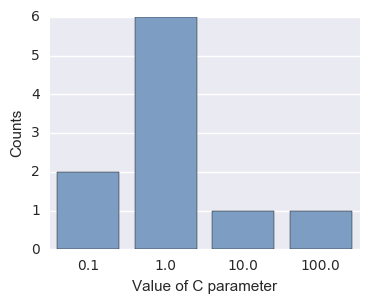

In [209]:
fig = plt.figure(figsize = (4,3))
ax = sns.barplot(x=c_params_counts.index, y=c_params_counts, color=tableau10['blue'])
ax.set_yticks(np.arange(0,max(c_params_counts)+1,1))
ax.set(xlabel='Value of C parameter', ylabel='Counts')
# plt.savefig("./tex/figures/cv-c-counts.pdf", bbox_inches='tight', pad_inches=0)

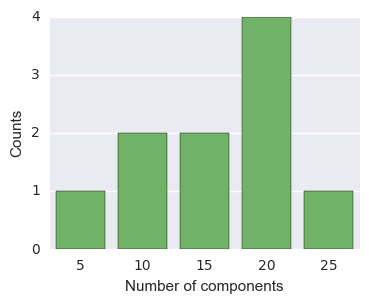

In [210]:
fig = plt.figure(figsize = (4,3))
ax = sns.barplot(x=n_pca_counts.index, y=n_pca_counts, color=tableau10['green'])
ax.set_yticks(np.arange(0,max(n_pca_counts)+1,1))
ax.set(xlabel='Number of components', ylabel='Counts')
# plt.savefig("./tex/figures/cv-pca-n-counts.pdf", bbox_inches='tight', pad_inches=0)

### Exploring how the number of PCA components affects performance 

In [276]:
from sklearn.svm import SVC

# up to 30 PCA components
pca_range = range(1,31,1)
# only use the best value for C
clf = SVC(kernel='linear', random_state=42)
grid = [{
        'classify__C':[1.0],
        'dim_reduce__n_components':pca_range
        }]

# run 100 reshuffles for each possible value of PCA components
gd = cs.piper(X_log, y_coded, clf, grid=grid, n_splits=100)

# make data for plotting
data = []
for f in range(0,100,1):
    key = 'split{}_test_score'.format(f)
    data.append(gd.cv_results_[key])
# seaborn does not accept lists   
data = np.array(data)

Fitting 100 folds for each of 30 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   36.3s finished


In [277]:
# best number of components is 14
gd.best_params_

{'classify__C': 1.0, 'dim_reduce__n_components': 14}

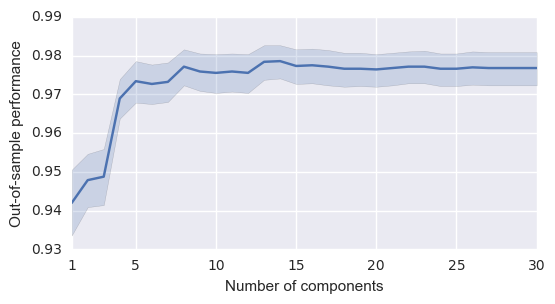

In [289]:
# plot and write
# with 99% confidence interval
fig = plt.figure(figsize = (6,3))
ax = sns.tsplot(data=data, ci=99, time=range(1,31,1))
ax.set(xlabel='Number of components', ylabel='Out-of-sample performance')
ax.set_xticks([1,5,10,15,20,25,30]);
# plt.savefig("./tex/figures/pca-best-components.pdf", bbox_inches='tight', pad_inches=0)